## Training Results

Below are some graphs to show the results from training the DQN and DDQN.

First I load the training results and then define the variables and methods I'll use to show the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dqn_results = np.load('dqn_results.npy')
dqn_scores = dqn_results[0, :]
dqn_mean_10_scores = dqn_results[1, :]
ddqn_results = np.load('ddqn_results.npy')
ddqn_scores = ddqn_results[0, :]
ddqn_mean_10_scores = ddqn_results[1, :]

In [3]:
dqn_max_r = np.max(dqn_results, axis=0)
dqn_min_r = np.min(dqn_results, axis=0)
dqn_mean_r = dqn_results[1, :]
dqn_x = np.arange(len(dqn_mean_r))

In [4]:
ddqn_max_r = np.max(ddqn_results, axis=0)
ddqn_min_r = np.min(ddqn_results, axis=0)
ddqn_mean_r = ddqn_results[1,:]
ddqn_x = np.arange(len(ddqn_mean_r))

In [5]:
def plot_results(x, max_x, min_x, mean_x, training_agent):
    fig, axs = plt.subplots(1, 1, figsize=(15,10), sharey=False, sharex=True)
    axs.plot(max_x, 'orange', linewidth=1, alpha=0.3)
    axs.plot(min_x, 'orange', linewidth=1, alpha=0.3)
    axs.plot(mean_x, 'b-', label='Moving Average(10 scores)', linewidth=2)
    axs.fill_between(x, min_x, max_x, facecolor='orange', alpha=0.3)
    axs.set_title('{} Scores (Training)'.format(training_agent))
    plt.xlabel('Episodes')
    plt.ylabel('Score')
    axs.legend(loc='upper left')
    plt.show()

### DQN Training Results

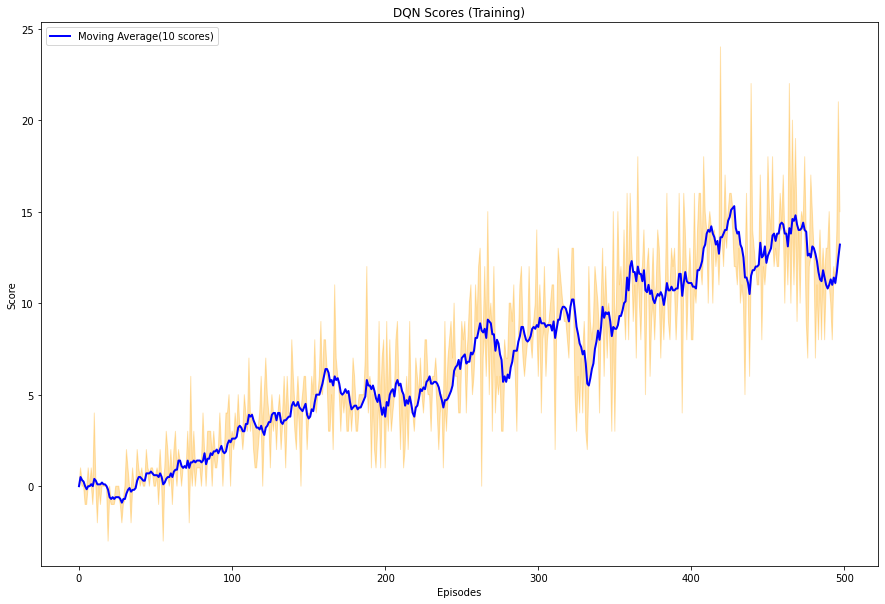

In [6]:
plot_results(dqn_x, dqn_max_r, dqn_min_r, dqn_mean_r, 'DQN')

### DDQN Training Results

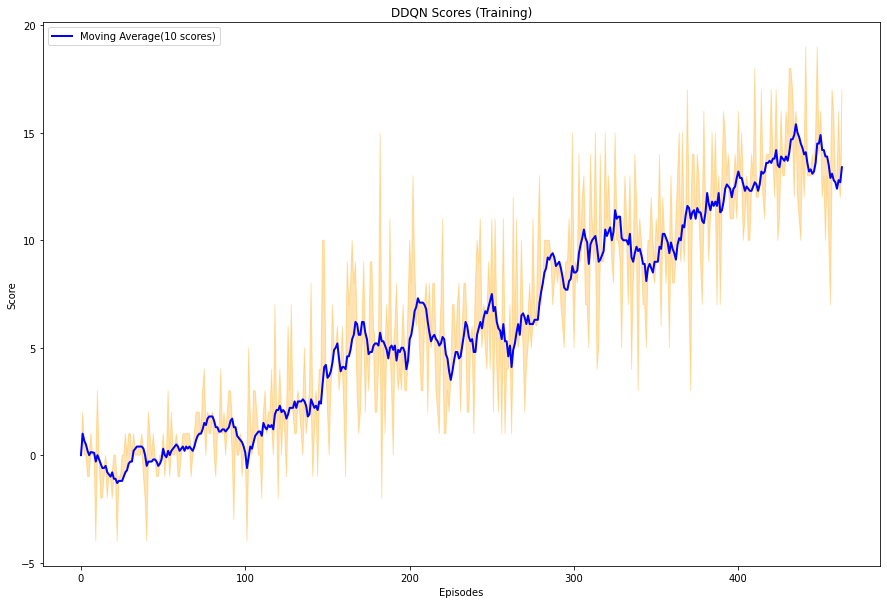

In [7]:
plot_results(ddqn_x, ddqn_max_r, ddqn_min_r, ddqn_mean_r, 'DDQN')

### Comparing the DQN and DDQN Training Results

Here I compare the DQN and DDQN training results and highlight how the DDQN is better.

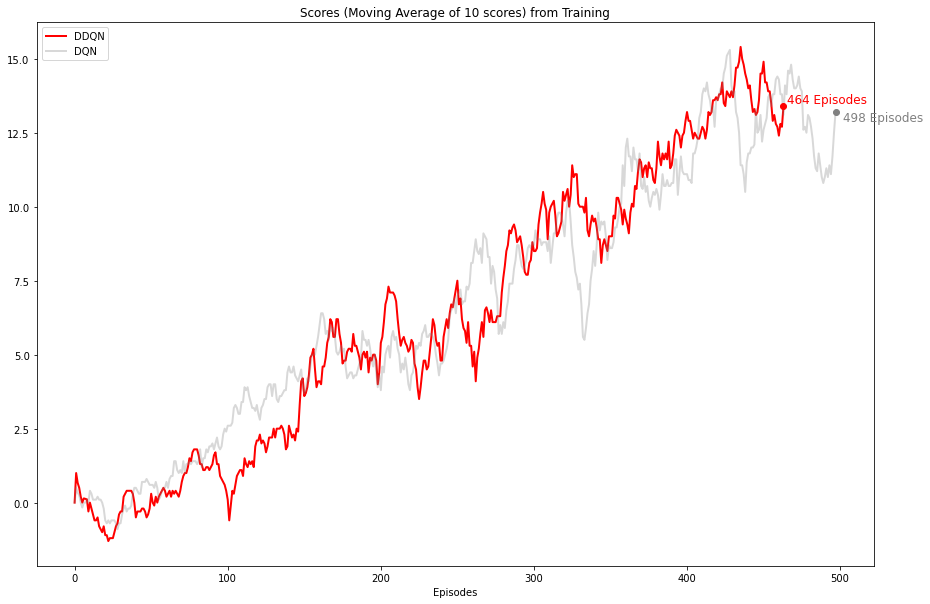

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(15,10), sharey=False, sharex=True)
axs.plot(ddqn_mean_r, 'r-', label='DDQN', linewidth=2)
axs.plot(dqn_mean_r, 'grey', label='DQN', linewidth=2, alpha=0.3)
axs.plot(len(dqn_mean_r)-1, dqn_mean_r[-1], marker='o', color='grey', markersize=6)
plt.annotate('{} Episodes'.format(len(dqn_mean_r)), 
             (len(dqn_mean_r)+4, 12.9), 
             fontsize=12,
             color='grey'
            )
axs.plot(len(ddqn_mean_r)-1, ddqn_mean_r[-1], marker='o', color='red', markersize=6)
plt.annotate('{} Episodes'.format(len(ddqn_mean_r)), 
             (len(ddqn_mean_r)+1, 13.5), 
             fontsize=12,
             color='red'
            )
axs.set_title('Scores (Moving Average of 10 scores) from Training')
plt.xlabel('Episodes')
axs.legend(loc='upper left')
plt.savefig('summary_scores.png', bbox_inches='tight')
plt.show()